In [4]:
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [9]:
from fl.preprocessing import load_mnist, data_to_client
from fl.model import NN
from fl.utils import plot_train_and_test, weights_to_json
from fl.federated_learning import federated

# Challenge 1 : Du poison [1/2]

Ces deux challenges visent à présenter la technique de *federated learning*, ainsi que les potentiels dangers à prendre en compte.

![du_poison.jpg](https://i.imgflip.com/8nfipd.jpg)

*Cette suite de challenges est accompagnée d'un module python. Il est téléchargeable ici : https://github.com/Sckathach/404CTF-2024-Intelligence-artificielle.git, ou directement sur le CTFd.* 

## *Federated Learning*

Parfois, au lieu de faire tout l'entraînement d'un coup depuis une unique base de donnée, l'on préfère entraîner **plusieurs versions du modèle** sur des données variées et potentiellement décentralisées. C'est le cas par exemple des algorithmes de recommandation qui vont s'entraîner directement sur les machines des utilisateurs, pour ensuite **s'agréger dans un serveur commun.**

C'est le cas du *federated learning*, chaque client reçoit une version du modèle, continue l'entraînement avec ses données (possibilité de protéger les données avec par exemple du *differential privacy machine learning*), et envoie les poids qu'il a obtenu au serveur central. 

On va simuler une étape avec 5 clients. Le modèle de base est `weights/base_fl.weights.h5`.

On commence d'abord par récupérer les données : 

In [10]:
epochs = 5
epochs_fl = 1
nb_clients = 5

x_train, y_train, x_test, y_test = load_mnist()
x_clients, y_clients = data_to_client(x_train, y_train, nb_clients=nb_clients)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Tout le processus de l'apprentissage fédéré est contenu dans la fonction `federated` : 

In [13]:
federated_learning = federated(
    NN(),
    x_clients, 
    y_clients, 
    x_test, 
    y_test, 
    fl_iterations=epochs,
    epochs_fl=epochs_fl
)

/home/patate/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Federated learning iteration: 1
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Federated Accuracy: 0.919
Federated learning iteration: 2
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Federated Accuracy: 0.937
Federated learning iteration: 3
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Federated Accuracy: 0.936
Federated learning iteration: 4
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━

On peut ensuite afficher les résultats :

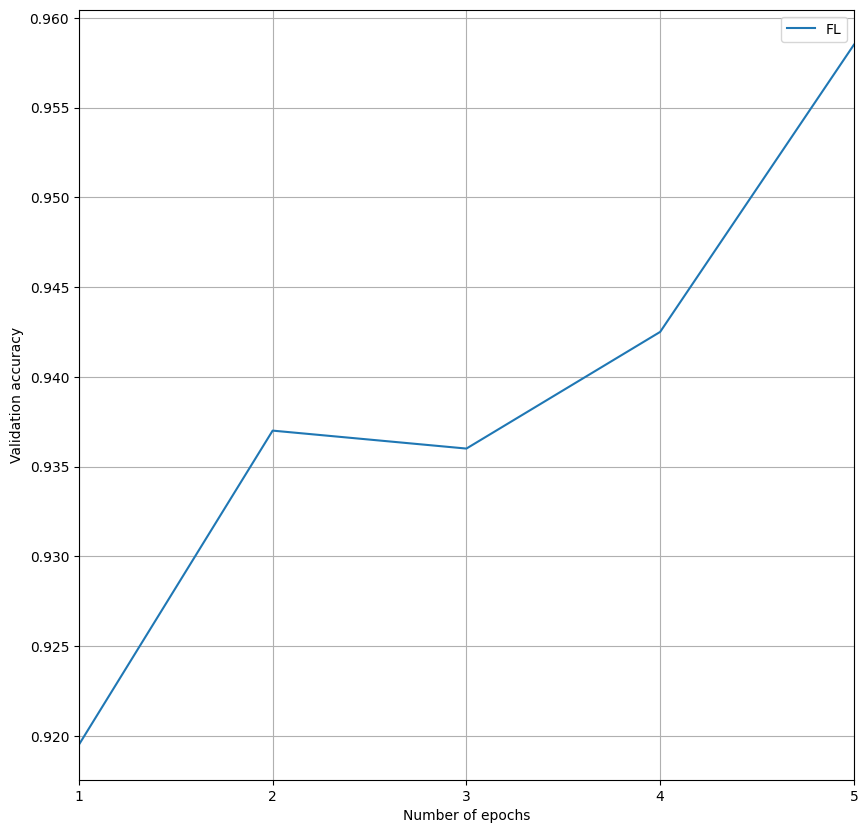

In [14]:
history = federated_learning["history_acc"]
plot_train_and_test([history], ["FL"], epochs)

## À vous de jouer !

Vous représentez **un client sur 5**, trouvez un moyen d'empoisonner le modèle pour faire descendre la précision au plus bas ! 

In [19]:
import numpy as np

In [65]:
test = federated_learning['weights']
print(test[0][:5])
# multiply all values of test by -1
for i, array in enumerate(test):
    np.multiply(array, -10, out=array)
    test[i] = array
print(test[0][:5])

[[-5.7940633e+25  2.2917038e+25  1.1724991e+25 ...  4.7931494e+25
  -5.0585330e+25  4.7384751e+25]
 [ 1.9929890e+25  2.4500216e+25  2.1387752e+25 ...  3.2452287e+25
  -1.8330475e+24 -4.1286553e+25]
 [-6.4381933e+24  2.5936676e+25  2.3952820e+25 ...  6.9964672e+22
  -5.8901313e+24 -2.7019237e+25]
 [ 2.8864529e+25 -4.4279666e+25  5.2750245e+25 ...  1.6132433e+25
  -4.0156906e+25  5.1164604e+25]
 [ 1.2383086e+25 -1.6115966e+25 -4.5588001e+25 ... -3.2461775e+25
  -8.2513122e+24 -2.7363780e+25]]
[[ 5.7940633e+26 -2.2917038e+26 -1.1724991e+26 ... -4.7931496e+26
   5.0585329e+26 -4.7384749e+26]
 [-1.9929890e+26 -2.4500217e+26 -2.1387753e+26 ... -3.2452287e+26
   1.8330474e+25  4.1286551e+26]
 [ 6.4381931e+25 -2.5936676e+26 -2.3952820e+26 ... -6.9964674e+23
   5.8901312e+25  2.7019238e+26]
 [-2.8864528e+26  4.4279668e+26 -5.2750243e+26 ... -1.6132432e+26
   4.0156905e+26 -5.1164605e+26]
 [-1.2383086e+26  1.6115965e+26  4.5587999e+26 ...  3.2461776e+26
   8.2513126e+25  2.7363780e+26]]


In [5]:
model = ...
raise NotImplementedError

## Récupération du drapeau 

Pour récupérer le drapeau, il faut jouer le jeu et envoyer ses poids au serveur qui s'occupera de l'aggregation des différents clients. Dans notre cas, le serveur se trouve à l'adresse https://du-poison.challenges.404ctf.fr

In [11]:
import requests as rq

URL = "https://du-poison.challenges.404ctf.fr"
rq.get(URL + "/healthcheck").json()

{'message': 'Statut : en pleine forme !'}

In [66]:
d = weights_to_json(test) 
rq.post(URL + "/challenges/1", json=d).json()

{'message': 'Bravo ! Voici le drapeau : 404CTF{0h___dU_P01sON}'}